In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn =pd.read_csv('Churn Prediction project case study.csv')

In [49]:
churn['avg_days_of_usage_avg'].nunique()

443

In [67]:
churn['federal_state'].value_counts()

F          199
J          126
D          121
A          104
E           72
G           67
H           51
P           41
C           40
B           34
M           32
Q           28
N           25
K           22
Unknown     19
L           15
R            4
Name: federal_state, dtype: int64

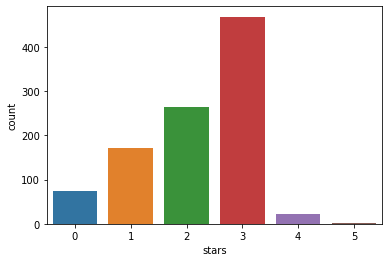

In [72]:
sns.countplot(churn['stars'])

In [3]:
np.random.seed(0)

In [4]:
churn.sample(5)

,canc_flag,gender,year_of_birth,federal_state,region_type (Locality),qu_avg_liv_area,serv_revenue_avg,revenue_avg,discount_avg,instalment_avg,...,data_vol_roaming_avg,voice_min_international_std,voice_min_onnet_std,voice_min_offnet_std,voice_min_roaming_std,data_vol_total_std,data_vol_roaming_std,tot_nbr_calls,nbr_dropped_calls,avg_days_of_usage_avg
993,0,M,1969.0,K,4,3.0450,42.4914,61.6728,-19.1814,0.0,...,0.0071,0.0000,79.5650,263.2387,0.0,0.4302,0.0174,56.0,2.0,NaN
859,0,F,1954.0,F,4,3.3418,34.8975,39.1038,-4.2063,0.0,...,0.0000,0.0000,26.5707,7.2063,0.0,0.3289,0.0000,9.0,0.0,NaN
298,0,F,1971.0,F,4,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.2828,6.2572,1.6785,0.0,0.4953,0.0000,22.0,0.0,NaN
553,0,F,1962.0,C,2,3.6279,11.2689,11.2689,0.0000,0.0,...,0.0000,0.0000,8.8554,2.0911,0.0,0.0167,0.0000,4.0,0.0,NaN
672,0,M,1997.0,H,-1,2.5099,54.0246,75.0438,-21.0191,0.0,...,0.0000,0.0000,52.9336,3.5868,0.0,3.7705,0.0000,51.0,0.0,NaN


In [5]:
# Calculate total number of cells in dataframe
totalCells = np.product(churn.shape)
print(totalCells)

44000


In [51]:
# Count number of missing values per column
missingCount = churn.isnull().sum()
print(missingCount)


canc_flag                        0
gender                           0
year_of_birth                    2
federal_state                    0
region_type (Locality)           0
qu_avg_liv_area                134
serv_revenue_avg                36
revenue_avg                     36
discount_avg                    36
instalment_avg                  36
serv_revenue_std                36
revenue_std                     36
voucher_std                     36
discount_std                    36
instalment_std                  36
subs_hand_ind                    0
current_tariff_option            0
l3_tariff_desc                   0
l4_tariff_desc                   0
l5_tariff_desc                   0
tariff_group                     0
device_type                      0
months_since_act                 0
stars                            0
nbr_contract_cycles              0
remaining_months                 0
mon_since_con_start              0
mon_since_last_subsi           150
mon_til_next_subsi  

In [7]:
# Calculate total number of missing values
totalMissing = missingCount.sum()
print(totalMissing)

1870


In [8]:
# Calculate percentage of missing values
print("The churn dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The churn dataset contains 4.25 % missing values.


In [9]:
missingCount[['qu_avg_liv_area', 'serv_revenue_avg','revenue_avg','discount_avg','instalment_avg','serv_revenue_std',
             'revenue_std','voucher_std','discount_std','instalment_std','mon_since_last_subsi','voice_min_wireline_avg',
             'voice_min_onnet_avg','voice_min_offnet_avg','voice_min_roaming_avg','data_vol_total_avg','data_vol_roaming_avg',
             'voice_min_international_std','voice_min_onnet_std','voice_min_offnet_std','voice_min_roaming_std',
              'data_vol_total_std','data_vol_roaming_std','tot_nbr_calls','nbr_dropped_calls']]

qu_avg_liv_area                134
serv_revenue_avg                36
revenue_avg                     36
discount_avg                    36
instalment_avg                  36
serv_revenue_std                36
revenue_std                     36
voucher_std                     36
discount_std                    36
instalment_std                  36
mon_since_last_subsi           150
voice_min_wireline_avg          12
voice_min_onnet_avg             12
voice_min_offnet_avg            12
voice_min_roaming_avg           12
data_vol_total_avg              12
data_vol_roaming_avg            12
voice_min_international_std     12
voice_min_onnet_std             12
voice_min_offnet_std            12
voice_min_roaming_std           12
data_vol_total_std              12
data_vol_roaming_std            12
tot_nbr_calls                  279
nbr_dropped_calls              279
dtype: int64

In [10]:
imputechurn= churn.fillna(method='ffill', axis=0).fillna("0")

imputechurn.head()

,canc_flag,gender,year_of_birth,federal_state,region_type (Locality),qu_avg_liv_area,serv_revenue_avg,revenue_avg,discount_avg,instalment_avg,...,data_vol_roaming_avg,voice_min_international_std,voice_min_onnet_std,voice_min_offnet_std,voice_min_roaming_std,data_vol_total_std,data_vol_roaming_std,tot_nbr_calls,nbr_dropped_calls,avg_days_of_usage_avg
0,0,M,1955.0,A,3,3.0000,37.6320,41.8323,-4.2003,0.0,...,0.0,2.7994,37.7164,39.8404,0.9273,0.0572,0.0,21.0,0.0,0
1,0,F,1960.0,B,2,3.5955,40.0502,43.0748,-3.0245,0.0,...,0.0,0.0000,55.1292,9.9478,4.4406,0.3505,0.0,28.0,0.0,0
2,0,M,1973.0,C,2,3.0068,48.2823,60.8904,-12.6081,0.0,...,0.0,0.0945,20.2999,412.4782,0.0000,0.1626,0.0,209.0,2.0,10.9211
3,0,M,1995.0,D,2,3.0068,11.5331,11.7693,-0.2362,0.0,...,0.0,0.0000,0.2917,3.2333,0.0000,0.0213,0.0,7.0,0.0,5.505
4,1,M,1979.0,E,4,3.3750,34.4719,39.9142,-5.4423,0.0,...,0.0,0.0000,0.1110,15.7327,0.0000,0.1886,0.0,7.0,0.0,5.505


In [11]:
for col in imputechurn.columns:
    pct_missing = np.mean(imputechurn[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

canc_flag - 0.0%
gender - 0.0%
year_of_birth - 0.0%
federal_state - 0.0%
region_type (Locality) - 0.0%
qu_avg_liv_area - 0.0%
serv_revenue_avg - 0.0%
revenue_avg - 0.0%
discount_avg - 0.0%
instalment_avg - 0.0%
serv_revenue_std - 0.0%
revenue_std - 0.0%
voucher_std - 0.0%
discount_std - 0.0%
instalment_std - 0.0%
subs_hand_ind - 0.0%
current_tariff_option - 0.0%
l3_tariff_desc - 0.0%
l4_tariff_desc - 0.0%
l5_tariff_desc - 0.0%
tariff_group - 0.0%
device_type - 0.0%
months_since_act - 0.0%
stars - 0.0%
nbr_contract_cycles - 0.0%
remaining_months - 0.0%
mon_since_con_start - 0.0%
mon_since_last_subsi - 0.0%
mon_til_next_subsi - 0.0%
voice_min_wireline_avg - 0.0%
voice_min_onnet_avg - 0.0%
voice_min_offnet_avg - 0.0%
voice_min_roaming_avg - 0.0%
data_vol_total_avg - 0.0%
data_vol_roaming_avg - 0.0%
voice_min_international_std - 0.0%
voice_min_onnet_std - 0.0%
voice_min_offnet_std - 0.0%
voice_min_roaming_std - 0.0%
data_vol_total_std - 0.0%
data_vol_roaming_std - 0.0%
tot_nbr_calls - 0.0%

In [12]:
print(imputechurn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
canc_flag                      1000 non-null int64
gender                         1000 non-null object
year_of_birth                  1000 non-null float64
federal_state                  1000 non-null object
region_type (Locality)         1000 non-null int64
qu_avg_liv_area                1000 non-null float64
serv_revenue_avg               1000 non-null float64
revenue_avg                    1000 non-null float64
discount_avg                   1000 non-null float64
instalment_avg                 1000 non-null float64
serv_revenue_std               1000 non-null float64
revenue_std                    1000 non-null float64
voucher_std                    1000 non-null float64
discount_std                   1000 non-null float64
instalment_std                 1000 non-null float64
subs_hand_ind                  1000 non-null int64
current_tariff_option          1000 non-null object
l3

In [13]:
imputechurn.drop(['current_tariff_option', 'l3_tariff_desc','l4_tariff_desc','l5_tariff_desc','tariff_group'], axis = 1) 

,canc_flag,gender,year_of_birth,federal_state,region_type (Locality),qu_avg_liv_area,serv_revenue_avg,revenue_avg,discount_avg,instalment_avg,...,data_vol_roaming_avg,voice_min_international_std,voice_min_onnet_std,voice_min_offnet_std,voice_min_roaming_std,data_vol_total_std,data_vol_roaming_std,tot_nbr_calls,nbr_dropped_calls,avg_days_of_usage_avg
0,0,M,1955.0,A,3,3.0000,37.6320,41.8323,-4.2003,0.0000,...,0.0000,2.7994,37.7164,39.8404,0.9273,0.0572,0.0000,21.0,0.0,0
1,0,F,1960.0,B,2,3.5955,40.0502,43.0748,-3.0245,0.0000,...,0.0000,0.0000,55.1292,9.9478,4.4406,0.3505,0.0000,28.0,0.0,0
2,0,M,1973.0,C,2,3.0068,48.2823,60.8904,-12.6081,0.0000,...,0.0000,0.0945,20.2999,412.4782,0.0000,0.1626,0.0000,209.0,2.0,10.9211
3,0,M,1995.0,D,2,3.0068,11.5331,11.7693,-0.2362,0.0000,...,0.0000,0.0000,0.2917,3.2333,0.0000,0.0213,0.0000,7.0,0.0,5.505
4,1,M,1979.0,E,4,3.3750,34.4719,39.9142,-5.4423,0.0000,...,0.0000,0.0000,0.1110,15.7327,0.0000,0.1886,0.0000,7.0,0.0,5.505
5,0,F,1958.0,F,3,3.3750,26.4143,47.5665,-21.1522,0.0000,...,0.0000,0.0000,18.5472,27.1886,1.0743,0.0824,0.0000,48.0,0.0,5.505
6,0,M,1986.0,G,3,2.5491,35.7599,48.3680,-12.6081,0.0000,...,0.1790,0.0000,5.3428,7.7821,0.2554,0.8649,0.1987,14.0,0.0,5.505
7,0,F,1971.0,A,3,2.5406,11.7734,11.7734,0.0000,0.0000,...,0.0000,0.0000,3.4858,1.0835,0.0000,0.0000,0.0000,5.0,0.0,5.505
8,0,M,1967.0,Unknown,-1,2.5406,64.2208,64.2208,0.0000,0.0000,...,0.0000,0.0000,14.0865,113.0393,0.0000,1.6903,0.0000,21.0,0.0,12.4925
9,0,M,1951.0,Unknown,-1,2.5406,30.6825,30.6825,0.0000,0.0000,...,0.0000,0.0000,10.2338,3.5517,0.0000,0.0000,0.0000,21.0,0.0,12.4925


In [14]:
print(imputechurn['gender'].value_counts())

M    530
F    470
Name: gender, dtype: int64


In [15]:
print(imputechurn['federal_state'].value_counts())
print(imputechurn['federal_state'].value_counts().count())

F          199
J          126
D          121
A          104
E           72
G           67
H           51
P           41
C           40
B           34
M           32
Q           28
N           25
K           22
Unknown     19
L           15
R            4
Name: federal_state, dtype: int64
17


In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
state_count = imputechurn['federal_state'].value_counts()
sns.set(style="darkgrid")
sns.barplot(state_count.index, state_count.values, alpha=0.9)
plt.title('Frequency Distribution of state')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('federal_state', fontsize=12)
plt.show()

In [16]:
replace_map = {'federal_state': {'A': 1, 'B': 2, 'C': 3, 'D': 4,
                                  'E': 5, 'F': 6, 'G': 7 , 'H': 8 , 'J': 9,'K': 10,'L': 11,'M': 12,'N':13,'P' :14,
                                  'Q':15,'R':16,'Unknown':17}}

In [17]:
imputechurn.replace(replace_map, inplace=True)

print(imputechurn.head())

   canc_flag gender  year_of_birth  federal_state  region_type (Locality)  \
0          0      M         1955.0              1                       3   
1          0      F         1960.0              2                       2   
2          0      M         1973.0              3                       2   
3          0      M         1995.0              4                       2   
4          1      M         1979.0              5                       4   

   qu_avg_liv_area  serv_revenue_avg  revenue_avg  discount_avg  \
0           3.0000           37.6320      41.8323       -4.2003   
1           3.5955           40.0502      43.0748       -3.0245   
2           3.0068           48.2823      60.8904      -12.6081   
3           3.0068           11.5331      11.7693       -0.2362   
4           3.3750           34.4719      39.9142       -5.4423   

   instalment_avg  ...  data_vol_roaming_avg  voice_min_international_std  \
0             0.0  ...                   0.0             

In [18]:
replace_map = {'gender': {'M': 0, 'F': 1}}
imputechurn.replace(replace_map, inplace=True)
print(imputechurn.head())

   canc_flag  gender  year_of_birth  federal_state  region_type (Locality)  \
0          0       0         1955.0              1                       3   
1          0       1         1960.0              2                       2   
2          0       0         1973.0              3                       2   
3          0       0         1995.0              4                       2   
4          1       0         1979.0              5                       4   

   qu_avg_liv_area  serv_revenue_avg  revenue_avg  discount_avg  \
0           3.0000           37.6320      41.8323       -4.2003   
1           3.5955           40.0502      43.0748       -3.0245   
2           3.0068           48.2823      60.8904      -12.6081   
3           3.0068           11.5331      11.7693       -0.2362   
4           3.3750           34.4719      39.9142       -5.4423   

   instalment_avg  ...  data_vol_roaming_avg  voice_min_international_std  \
0             0.0  ...                   0.0       

In [19]:
print(imputechurn['device_type'].value_counts())

Unknown       497
SMARTPHONE    340
IPHONE        150
SUNK           13
Name: device_type, dtype: int64


In [31]:
replace_map = {'device_type': {'SMARTPHONE': 0, 'IPHONE': 1,'SUNK':2,'Unknown':3}}
imputechurn.replace(replace_map, inplace=True)
print(imputechurn.head())

   canc_flag  gender  year_of_birth  federal_state  region_type (Locality)  \
0          0       0         1955.0              1                       3   
1          0       1         1960.0              2                       2   
2          0       0         1973.0              3                       2   
3          0       0         1995.0              4                       2   
4          1       0         1979.0              5                       4   

   qu_avg_liv_area  serv_revenue_avg  revenue_avg  discount_avg  \
0           3.0000           37.6320      41.8323       -4.2003   
1           3.5955           40.0502      43.0748       -3.0245   
2           3.0068           48.2823      60.8904      -12.6081   
3           3.0068           11.5331      11.7693       -0.2362   
4           3.3750           34.4719      39.9142       -5.4423   

   instalment_avg  ...  data_vol_roaming_avg  voice_min_international_std  \
0             0.0  ...                   0.0       

In [32]:
print(imputechurn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
canc_flag                      1000 non-null int64
gender                         1000 non-null int64
year_of_birth                  1000 non-null float64
federal_state                  1000 non-null int64
region_type (Locality)         1000 non-null int64
qu_avg_liv_area                1000 non-null float64
serv_revenue_avg               1000 non-null float64
revenue_avg                    1000 non-null float64
discount_avg                   1000 non-null float64
instalment_avg                 1000 non-null float64
serv_revenue_std               1000 non-null float64
revenue_std                    1000 non-null float64
voucher_std                    1000 non-null float64
discount_std                   1000 non-null float64
instalment_std                 1000 non-null float64
subs_hand_ind                  1000 non-null int64
current_tariff_option          1000 non-null object
l3_t

In [22]:
imputechurn.drop(['current_tariff_option', 'l3_tariff_desc','l4_tariff_desc','l5_tariff_desc','tariff_group'], axis = 1) 

,canc_flag,gender,year_of_birth,federal_state,region_type (Locality),qu_avg_liv_area,serv_revenue_avg,revenue_avg,discount_avg,instalment_avg,...,data_vol_roaming_avg,voice_min_international_std,voice_min_onnet_std,voice_min_offnet_std,voice_min_roaming_std,data_vol_total_std,data_vol_roaming_std,tot_nbr_calls,nbr_dropped_calls,avg_days_of_usage_avg
0,0,0,1955.0,1,3,3.0000,37.6320,41.8323,-4.2003,0.0000,...,0.0000,2.7994,37.7164,39.8404,0.9273,0.0572,0.0000,21.0,0.0,0
1,0,1,1960.0,2,2,3.5955,40.0502,43.0748,-3.0245,0.0000,...,0.0000,0.0000,55.1292,9.9478,4.4406,0.3505,0.0000,28.0,0.0,0
2,0,0,1973.0,3,2,3.0068,48.2823,60.8904,-12.6081,0.0000,...,0.0000,0.0945,20.2999,412.4782,0.0000,0.1626,0.0000,209.0,2.0,10.9211
3,0,0,1995.0,4,2,3.0068,11.5331,11.7693,-0.2362,0.0000,...,0.0000,0.0000,0.2917,3.2333,0.0000,0.0213,0.0000,7.0,0.0,5.505
4,1,0,1979.0,5,4,3.3750,34.4719,39.9142,-5.4423,0.0000,...,0.0000,0.0000,0.1110,15.7327,0.0000,0.1886,0.0000,7.0,0.0,5.505
5,0,1,1958.0,6,3,3.3750,26.4143,47.5665,-21.1522,0.0000,...,0.0000,0.0000,18.5472,27.1886,1.0743,0.0824,0.0000,48.0,0.0,5.505
6,0,0,1986.0,7,3,2.5491,35.7599,48.3680,-12.6081,0.0000,...,0.1790,0.0000,5.3428,7.7821,0.2554,0.8649,0.1987,14.0,0.0,5.505
7,0,1,1971.0,1,3,2.5406,11.7734,11.7734,0.0000,0.0000,...,0.0000,0.0000,3.4858,1.0835,0.0000,0.0000,0.0000,5.0,0.0,5.505
8,0,0,1967.0,17,-1,2.5406,64.2208,64.2208,0.0000,0.0000,...,0.0000,0.0000,14.0865,113.0393,0.0000,1.6903,0.0000,21.0,0.0,12.4925
9,0,0,1951.0,17,-1,2.5406,30.6825,30.6825,0.0000,0.0000,...,0.0000,0.0000,10.2338,3.5517,0.0000,0.0000,0.0000,21.0,0.0,12.4925


In [23]:
print(imputechurn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
canc_flag                      1000 non-null int64
gender                         1000 non-null int64
year_of_birth                  1000 non-null float64
federal_state                  1000 non-null int64
region_type (Locality)         1000 non-null int64
qu_avg_liv_area                1000 non-null float64
serv_revenue_avg               1000 non-null float64
revenue_avg                    1000 non-null float64
discount_avg                   1000 non-null float64
instalment_avg                 1000 non-null float64
serv_revenue_std               1000 non-null float64
revenue_std                    1000 non-null float64
voucher_std                    1000 non-null float64
discount_std                   1000 non-null float64
instalment_std                 1000 non-null float64
subs_hand_ind                  1000 non-null int64
current_tariff_option          1000 non-null object
l3_t

In [43]:
imputechurn=imputechurn.drop(columns =['year_of_birth','current_tariff_option', 'l3_tariff_desc','l4_tariff_desc','l5_tariff_desc','tariff_group'], axis = 1) 

KeyError: "['current_tariff_option' 'l3_tariff_desc' 'l4_tariff_desc'\n 'l5_tariff_desc' 'tariff_group'] not found in axis"

In [44]:
print(imputechurn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
canc_flag                      1000 non-null int64
gender                         1000 non-null int64
year_of_birth                  1000 non-null float64
federal_state                  1000 non-null int64
region_type (Locality)         1000 non-null int64
qu_avg_liv_area                1000 non-null float64
serv_revenue_avg               1000 non-null float64
revenue_avg                    1000 non-null float64
discount_avg                   1000 non-null float64
instalment_avg                 1000 non-null float64
serv_revenue_std               1000 non-null float64
revenue_std                    1000 non-null float64
voucher_std                    1000 non-null float64
discount_std                   1000 non-null float64
instalment_std                 1000 non-null float64
subs_hand_ind                  1000 non-null int64
device_type                    1000 non-null int64
month

In [45]:
churn1 = pd.DataFrame(imputechurn)

In [47]:
churn1.to_csv('churn_prediction.csv')

In [48]:
churn_data =pd.read_csv('churn_prediction.csv')

In [42]:
churn_data.describe

<bound method NDFrame.describe of      Unnamed: 0  canc_flag  gender  year_of_birth  federal_state  \
0             0          0       0         1955.0              1   
1             1          0       1         1960.0              2   
2             2          0       0         1973.0              3   
3             3          0       0         1995.0              4   
4             4          1       0         1979.0              5   
5             5          0       1         1958.0              6   
6             6          0       0         1986.0              7   
7             7          0       1         1971.0              1   
8             8          0       0         1967.0             17   
9             9          0       0         1951.0             17   
10           10          1       0         1994.0              5   
11           11          0       1         1967.0              2   
12           12          1       0         1975.0              4   
13           1